In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [35]:
data_path = r"D:\Kaggle\SemanticSegmentataion"
mask_path = os.path.join(data_path, 'CameraMask')
img_path = os.path.join(data_path, 'CameraRGB')
X = os.listdir(img_path)
y = os.listdir(mask_path)

split = int(len(X) * 0.8)
train_x = X[: split]
train_y = y[: split]
val_x = X[split: ]
val_y = y[split: ]

del X, y

In [36]:
def process_data(img, mask):
    img_r = tf.strings.join([img_path, img], separator = os.path.sep)
    mask_r = tf.strings.join([mask_path, mask], separator = os.path.sep)
    img_r = tf.io.read_file(img_r)
    mask_r = tf.io.read_file(mask_r)
    img_r = tf.image.decode_png(img_r)
    mask_r = tf.image.decode_png(mask_r)
    img_r = tf.image.resize(img_r, (128, 128))
    mask_r = tf.image.resize(mask_r, (128, 128))
    img_r = img_r / 255.0
    mask_r = mask_r / 255.0
    return img_r, mask_r

In [37]:
train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))
val_ds = tf.data.Dataset.from_tensor_slices((val_x, val_y))

train_ds = (
    train_ds.map(process_data, num_parallel_calls = tf.data.AUTOTUNE)
    .batch(32)
    .prefetch(tf.data.AUTOTUNE)
)
val_ds = (
    val_ds.map(process_data, num_parallel_calls = tf.data.AUTOTUNE)
    .batch(32)
    .prefetch(tf.data.AUTOTUNE)
)

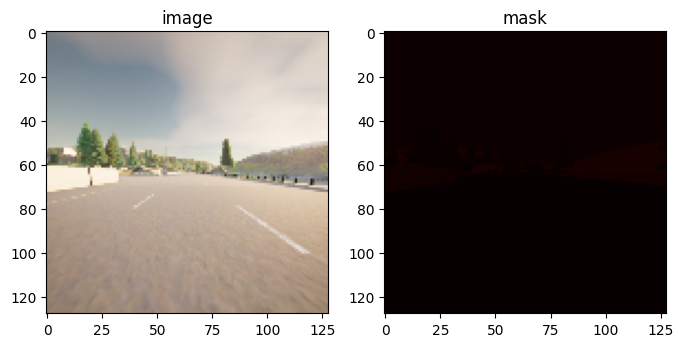

In [38]:
for i, m in train_ds.take(1):
    fig, ax = plt.subplots(1, 2, figsize = (8, 5))
    ax[0].imshow(i[0])
    ax[0].set_title("image")
    ax[1].imshow(m[0])
    ax[1].set_title("mask")

In [ ]:
def res_conv_block()